In [107]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/제 3회 KUIAI 해커톤/최종 추천 알고리즘')
print(os.getcwd()) # 현재 경로가 어딘지 확인

/content/drive/MyDrive/제 3회 KUIAI 해커톤/최종 추천 알고리즘


## Recommending Phase

전체 흐름도는 위와 같다.
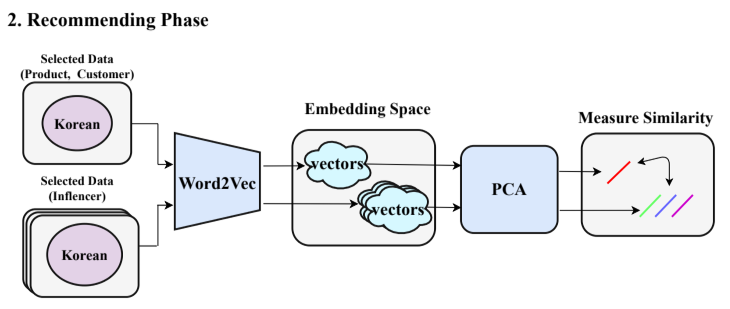



## 전처리된 최종 데이터 가져오기

최종 데이터는 상품, 소비자, 100명의 인플루언서에 대해서 Preprocessing Phase를 거친 데이터이다. (위 흐름도에서 Selected Data)

In [108]:
import pandas as pd
product_data = pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_최종.xlsx', index_col = 0) # 전처리된 상품 데이터
influencer_data = pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_최종.xlsx', index_col = 0) # 전처리된 인플루언서 데이터 
customer_data = pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_최종.xlsx') #전처리된 소비자 데이터

In [ ]:
# 전처리된 상품데이터 기본 정보 확인
print(product_data.head())
print('********************')
print(f'전처리된 상품데이터의 개수: {len(product_data)}')

   product                                               text
0    29960  룩 꾸안꾸 손쉽게 컬러블록 코듀로이 어다울 착용 하얀 카메라 여성 검은색 모자,리 ...
1    29961  룩 패딩을 컬러포인트 소재의 그래픽 크롭 셔츠 하얀 여성 검은색 좌석 바지,컬러포인...
2    29202  룩 스웨트셔츠에 패턴 멋지게 네이머클로딩 파라체이스 그림 여성 남성 포즈,네이머클로...
3    29975  코디하고 투큐브 컬러블록 룩 바시티 팀버랜드 셔츠 빨간색 장난감 보유 소년 파란색,...
4    29977  카디건과 컬러 이스트아르고 팬츠로 웨어 스트라이프 셔츠 착용 하얀 카메라 여성 모자...
********************
전처리된 상품데이터의 개수: 60


In [ ]:
# 전처리된 상품데이터 결측치 확인 -> 결측치가 존재하지 않음
product_data.isnull().sum()

product    0
text       0
dtype: int64

In [ ]:
# 전처리된 소비자데이터 기본 정보 확인
print(customer_data.head())
print('********************')
print(f'전처리된 소비자데이터의 개수: {len(customer_data)}')

   Unnamed: 0    user_name                                               text
0           1   @kxungho00  뭐해 광고팀 참이슬 여성 침상 좌석,ICN 지주 사람 서 있는 불안정한,누구야 마리...
1           2  @agree_seop                              탐방기 연대 남성 좌석 벤치 무기 펼친
2           3     @dlwlrma  광고 구시 재키 여성 침상 좌석 아기,있습니다 메리메리 잘 전 셔츠 착용 어린 컵 ...
3           4      @j_g_ok  많관부 블로구 테크 열었습니다 남성 자전거 언덕 승마,위로 저는 감사하고 행운이 석...
********************
전처리된 소비자데이터의 개수: 4


In [ ]:
# 전처리된 소비자데이터 결측치 확인 -> 결측치가 존재하지 않음
customer_data.isnull().sum()

Unnamed: 0    0
user_name     0
text          0
dtype: int64

In [109]:
# 전처리된 인플루언서 데이터 기본정보 확인
print(influencer_data.head())
print('********************')
print(f'전처리된 인플루언서 데이터의 수: {len(influencer_data)}')

       user_name                                               text
0  @98.c_project  컬러들 아이템도 첫 새해 아이템을 제작 하얀 여보세요 남성 모자 좌석 벤치,기모 차...
1    @ys971003__  가족을 가족과의 시간동안 남기고 이쁘게 부족했었던 을 위한 도시 여성 손 에프 좌석...
2     @malko_bee  코트 코트를 찾기가 코트코디 크기의 코트추천 셔츠 하얀 플레어 여성 검은색 좌석,겨...
3       @hotneul  둘의 형제 조합이 모두들 평안한 이들과 프렌치 워크 재킷 재킷 유케 텐 필리 캐시미...
4    @jung_staas  맨투맨코디 캐주얼패션 든다구 맨투맨 그린 오버핏이라 셔츠 선물 검은색 남성 마시다,...
********************
전처리된 인플루언서 데이터의 수: 100


In [110]:
# 전처리된 인플루언서 데이터 결측치 확인 -> tag에 대해 5개의 결측치 존재
influencer_data.isnull().sum()

user_name    0
text         5
dtype: int64

In [111]:
# 결측치가 존재하는 5명의 인플루언서 확인 -> 해당 5명의 제공된 인플루언서의 데이터 확인결과, 동영상 외에는 이미지, text 데이터가 존재하지 않음. -> 제거 결정
influencer_data['user_name'][influencer_data['text'].isnull()] 

18    @ba_serin_e
25        @tt__yl
28     @tlrou.vee
63    @hamnihouse
99       @bejoon0
Name: user_name, dtype: object

In [112]:
# 결측치가 있는 인플루언서 제거 (100 -> 95)
influencer_data.dropna(axis=0, inplace=True)

# 데이터 결측치 확인 -> 결측치가 존재하지 않는다는 것을 확인 
print(influencer_data.isnull().sum())
print(len(influencer_data))

user_name    0
text         0
dtype: int64
95


## Word2Vec

### Word2Vec 훈련

토큰을 Word2Vec을 이용하여 임베딩 공간으로 Projection하기 위해서, 다음과 같은 Word2Vec 훈련과정을 거쳤다. 

1. 대규모 한국어 Coupus에서 Pretrain 된 Word2Vec 모델을 load함. 
   - > pretrained model: https://github.com/Kyubyong/wordvectors
2. 모든 인플루언서 Text 데이터를 이용해 Finetuning 후 모델 저장
3. 추천하고자하는 상품정보 혹은 소비자정보가 들어오면 2.에서 훈련시킨 모델을 load하여 Finetuning하여 모델 저장

#### 인플루언서 

In [ ]:
# Word2Vec 훈련을 위해서 인플루언서 Text 데이터 문장단위로 분리 및 토큰화 
inflencer_text_data = list(influencer_data['text'])
influencer_text_split_data = [] # 인플루언서별로 구분하여 토큰화된 text를 저장. 문장 단위는 게시물로 정함.
all_influencer_text_split_data = [] # 모든 인플루언서의 토큰화된 text를 저장. 문장 단위는 게시물로 정함. 

for i in range(len(influencer_data)):
     temp_text_split_data = []
     temp1 = inflencer_text_data[i]
     temp2 = temp1.split(',') # 게시물 기준으로 분리 
     for j in range(len(temp2)):
       temp3 = temp2[j]
       temp4 = temp3.split(' ') # 하나의 게시물의 토큰들을 분리 
       temp_text_split_data.append(temp4)
       all_influencer_text_split_data.append(temp4)
     influencer_text_split_data.append(temp_text_split_data)


influencer_data['splited_text'] = influencer_text_split_data # 새로운 칼럼에 인플루언서별로 저장
print(influencer_data['splited_text'][:5]) 

0    [[컬러들, 아이템도, 첫, 새해, 아이템을, 제작, 하얀, 여보세요, 남성, 모자...
1    [[가족을, 가족과의, 시간동안, 남기고, 이쁘게, 부족했었던, 을, 위한, 도시,...
2    [[코트, 코트를, 찾기가, 코트코디, 크기의, 코트추천, 셔츠, 하얀, 플레어, ...
3    [[둘의, 형제, 조합이, 모두들, 평안한, 이들과, 프렌치, 워크, 재킷, 재킷,...
4    [[맨투맨코디, 캐주얼패션, 든다구, 맨투맨, 그린, 오버핏이라, 셔츠, 선물, 검...
Name: splited_text, dtype: object


In [ ]:
from gensim.models import Word2Vec

# 대규모 한글 Coupus에서 pretrain된 모델 load
pretrained_model = Word2Vec.load("./ko.bin")
pretrained_model.wv.save_word2vec_format("./ko.bin.gz", binary=False) # pretrained model save

In [ ]:
tokenized_data = all_influencer_text_split_data  

In [ ]:
# finetuning할 모델 load
finetuned_model = Word2Vec(size=200, min_count=1)
finetuned_model.build_vocab(tokenized_data)
total_examples = finetuned_model.corpus_count

In [ ]:
# finetuning할 모델에 pretrained 된 model의 정보를 추가
finetuned_model.build_vocab([list(pretrained_model.wv.vocab.keys())], update=True)
finetuned_model.intersect_word2vec_format("ko.bin.gz", binary=False) 

In [ ]:
# finetuning 진행
finetuned_model.train(tokenized_data, total_examples=total_examples, epochs=finetuned_model.iter)

<ipython-input-17-7ab29d370b65>:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  finetuned_model.train(tokenized_data, total_examples=total_examples, epochs=finetuned_model.iter)


(133528, 140285)

In [ ]:
finetuned_model.save("our_w2v_model_influencer.bin") # influencer의 모든 데이터에 대해서 finetuning한 model 저장

#### 상품+인플루언서 

In [ ]:
# Word2Vec 훈련을 위해서 상품데이터 Text 데이터 문장단위로 분리 및 토큰화 
product_text_data = list(product_data['text'])
product_text_split_data = [] #상품별로 구분하여 토큰화된 text를 저장. 문장 단위는 게시물로 정함.
all_product_text_split_data = [] # 모든 상품의 토큰화된 text를 저장. 문장 단위는 게시물로 정함. 

for i in range(len(product_text_data)):
     temp_text_split_data = []
     temp1 = product_text_data[i]
     temp2 = temp1.split(',') # 게시물 기준으로 분리 
     for j in range(len(temp2)):
       temp3 = temp2[j]
       temp4 = temp3.split(' ') # 하나의 게시물의 토큰들을 분리 
       temp_text_split_data.append(temp4)
       all_product_text_split_data.append(temp4)
     product_text_split_data.append(temp_text_split_data)

product_data['splited_text'] = product_text_split_data # 새로운 칼럼에 상품별로 저장
print(product_data['splited_text'][:5]) 

0    [[룩, 꾸안꾸, 손쉽게, 컬러블록, 코듀로이, 어다울, 착용, 하얀, 카메라, 여...
1    [[룩, 패딩을, 컬러포인트, 소재의, 그래픽, 크롭, 셔츠, 하얀, 여성, 검은색...
2    [[룩, 스웨트셔츠에, 패턴, 멋지게, 네이머클로딩, 파라체이스, 그림, 여성, 남...
3    [[코디하고, 투큐브, 컬러블록, 룩, 바시티, 팀버랜드, 셔츠, 빨간색, 장난감,...
4    [[카디건과, 컬러, 이스트아르고, 팬츠로, 웨어, 스트라이프, 셔츠, 착용, 하얀...
Name: splited_text, dtype: object


In [ ]:
our_influencer_w2v_model = Word2Vec.load("our_w2v_model_influencer.bin") # 저장한 model 불러오기 
our_influencer_w2v_model.wv.save_word2vec_format("./our_w2v_model_influencer.bin.gz", binary=False) # influencer model save

In [ ]:
tokenized_data = all_product_text_split_data  

In [ ]:
# finetuning할 모델 load
finetuned_model = Word2Vec(size=200, min_count=1)
finetuned_model.build_vocab(tokenized_data)
total_examples = finetuned_model.corpus_count

In [ ]:
# fineturning할 모델에 pretrained 된 model의 정보를 추가
finetuned_model.build_vocab([list(our_influencer_w2v_model.wv.vocab.keys())], update=True)
finetuned_model.intersect_word2vec_format("our_w2v_model_influencer.bin.gz", binary=False) 

In [ ]:
# finetuning 진행
finetuned_model.train(tokenized_data, total_examples=total_examples, epochs=finetuned_model.iter)

<ipython-input-25-7ab29d370b65>:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  finetuned_model.train(tokenized_data, total_examples=total_examples, epochs=finetuned_model.iter)


(18980, 19565)

In [ ]:
finetuned_model.save("our_w2v_model_influencer_product.bin") # influencer의 모든 데이터 + 상품 데이터에 대해서 finetuning한 model 저장

#### 소비자+인플루언서 

In [ ]:
# Word2Vec 훈련을 위해서 소비자데이터 Text 데이터 문장단위로 분리 및 토큰화 
customer_text_data = list(customer_data['text'])
customer_text_split_data = [] #소비자별로 구분하여 토큰화된 text를 저장. 문장 단위는 게시물로 정함.
all_customer_text_split_data = [] # 모든 소비자의 토큰화된 text를 저장. 문장 단위는 게시물로 정함. 

for i in range(len(customer_text_data)):
     temp_text_split_data = []
     temp1 = customer_text_data[i]
     temp2 = temp1.split(',') # 게시물 기준으로 분리 
     for j in range(len(temp2)):
       temp3 = temp2[j]
       temp4 = temp3.split(' ') # 하나의 게시물의 토큰들을 분리 
       temp_text_split_data.append(temp4)
       all_customer_text_split_data.append(temp4)
     customer_text_split_data.append(temp_text_split_data)

customer_data['splited_text'] = customer_text_split_data # 새로운 칼럼에 소비자별로 저장
print(customer_data['splited_text'][:5]) 

0    [[뭐해, 광고팀, 참이슬, 여성, 침상, 좌석], [ICN, 지주, 사람, 서, ...
1                      [[탐방기, 연대, 남성, 좌석, 벤치, 무기, 펼친]]
2    [[광고, 구시, 재키, 여성, 침상, 좌석, 아기], [있습니다, 메리메리, 잘,...
3    [[많관부, 블로구, 테크, 열었습니다, 남성, 자전거, 언덕, 승마], [위로, ...
Name: splited_text, dtype: object


In [ ]:
our_influencer_w2v_model = Word2Vec.load("our_w2v_model_influencer.bin") # 저장한 model 불러오기 
our_influencer_w2v_model.wv.save_word2vec_format("./our_w2v_model_influencer.bin.gz", binary=False) # influencer model save

In [ ]:
tokenized_data = all_customer_text_split_data  

In [ ]:
# finetuning할 모델 load
finetuned_model = Word2Vec(size=200, min_count=1)
finetuned_model.build_vocab(tokenized_data)
total_examples = finetuned_model.corpus_count

In [ ]:
# fineturning할 모델에 pretrained 된 model의 정보를 추가
finetuned_model.build_vocab([list(our_influencer_w2v_model.wv.vocab.keys())], update=True)
finetuned_model.intersect_word2vec_format("our_w2v_model_influencer.bin.gz", binary=False) 

In [ ]:
# finetuning 진행
finetuned_model.train(tokenized_data, total_examples=total_examples, epochs=finetuned_model.iter)

<ipython-input-32-7ab29d370b65>:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  finetuned_model.train(tokenized_data, total_examples=total_examples, epochs=finetuned_model.iter)


(2723, 2740)

In [ ]:
finetuned_model.save("our_w2v_model_influencer_customer.bin") # influencer의 모든 데이터 + 소비자 데이터에 대해서 finetuning한 model 저장

### Word2Vec 적용

훈련된 Word2Vec 모델을 load하고, input으로 들어온 상품정보, 소비자정보는 물론 인플루언서 각각에 대해서 '공백'과 ','으로 묶여있는 Text data를 다시 토크 단위로 분리한다. -> 각각의 토큰을 Word2Vec의 embedding space 상으로 projection한다.  

#### 인플루언서 

In [ ]:
influencer_w2v_model = Word2Vec.load("our_w2v_model_influencer.bin") # 저장한 model 불러오기 

In [ ]:
influencer_word_vectors = influencer_w2v_model.wv # 인플루언서의 토큰하나를 key로 주면 그에 대응하는 임베딩 벡터를 반환하는 딕셔너리 

In [ ]:
all_influencer_embedding_data = []
for i in range(len(influencer_text_split_data)):
     temp_embedding_data = []
     temp1 = influencer_text_split_data[i] # 인플루언서 한명에 대한 split text 데이터
     for j in range(len(temp1)): 
         temp2 = temp1[j] # 인플루언서 게시글 1개에 대한 데이터
         for k in range(len(temp2)):
            temp_embedding_data.append(list(influencer_word_vectors[temp2[k]]))
     all_influencer_embedding_data.append(temp_embedding_data)

In [ ]:
print(len(all_influencer_embedding_data)) # 모든 인플루언서의 수
print(len(all_influencer_embedding_data[0]))  # 첫번째 인플루언서의 단어 개수
print(len(all_influencer_embedding_data[0][0])) # embedding 차원

95
353
200


In [ ]:
import pickle

# 인플루언서의 임베딩벡터를 저장 
with open('all_influencer_embedding_data.pkl','wb') as f:
     pickle.dump(all_influencer_embedding_data,f)

In [114]:
# 저장한 임베딩벡터를 열때
with open('all_influencer_embedding_data.pkl','rb') as f:
       all_influencer_embedding_data = pickle.load(f)

#### 상품

In [ ]:
product_w2v_model = Word2Vec.load("our_w2v_model_influencer_product.bin") # 저장한 model 불러오기 

In [ ]:
product_word_vectors = product_w2v_model.wv # 상품데이터의 토큰하나를 key로 주면 그에 대응하는 임베딩 벡터를 반환하는 딕셔너리 

In [ ]:
all_product_embedding_data = []
for i in range(len(product_text_split_data)):
     temp_embedding_data = []
     temp1 = product_text_split_data[i] # 상품 한개에 대한 split text 데이터
     for j in range(len(temp1)): 
         temp2 = temp1[j] # 상품 게시글 1개에 대한 데이터
         for k in range(len(temp2)):
            temp_embedding_data.append(list(product_word_vectors[temp2[k]]))
     all_product_embedding_data.append(temp_embedding_data)

In [ ]:
len(product_text_split_data[0])

6

In [ ]:
print(len(all_product_embedding_data)) # 모든 상품의 수
print(len(all_product_embedding_data[0]))  # 첫번째 상품의 단어 개수
print(len(all_product_embedding_data[0][0])) # embedding 차원

60
72
200


In [ ]:
# 상품의 임베딩벡터를 저장 
with open('all_product_embedding_data.pkl','wb') as f:
     pickle.dump(all_product_embedding_data,f)

In [113]:
# 저장한 임베딩벡터를 열때
import pickle
with open('all_product_embedding_data.pkl','rb') as f:
       all_product_embedding_data = pickle.load(f)

#### 소비자

In [ ]:
customer_w2v_model = Word2Vec.load("our_w2v_model_influencer_customer.bin") # 저장한 model 불러오기 

In [ ]:
customer_word_vectors = customer_w2v_model.wv # 소비자데이터의 토큰하나를 key로 주면 그에 대응하는 임베딩 벡터를 반환하는 딕셔너리 

In [ ]:
all_customer_embedding_data = []
for i in range(len(customer_text_split_data)):
     temp_embedding_data = []
     temp1 = customer_text_split_data[i] # 소비자 한개에 대한 split text 데이터
     for j in range(len(temp1)): 
         temp2 = temp1[j] # 소비자 게시글 1개에 대한 데이터
         for k in range(len(temp2)):
            temp_embedding_data.append(list(customer_word_vectors[temp2[k]]))
     all_customer_embedding_data.append(temp_embedding_data)

In [ ]:
len(customer_text_split_data[0])

15

In [ ]:
print(len(all_customer_embedding_data)) # 모든 소비자의 수
print(len(all_customer_embedding_data[0]))  # 첫번째 소비자의 단어 개수
print(len(all_customer_embedding_data[0][0])) # embedding 차원

4
102
200


In [ ]:
# 소비자의 임베딩벡터를 저장 
with open('all_customer_embedding_data.pkl','wb') as f:
     pickle.dump(all_customer_embedding_data,f)

In [115]:
# 저장한 임베딩벡터를 열때
with open('all_customer_embedding_data.pkl','rb') as f:
       all_customer_embedding_data = pickle.load(f)
       

## PCA

In [116]:
from sklearn.decomposition import PCA
import numpy as np
import pickle

In [ ]:
# 각각 인플루언서, 상품, 소비자의 임베딩벡터를 의미
#all_influencer_embedding_data
#all_product_embedding_data
#all_customer_embedding_data

with open('all_influencer_embedding_data.pkl','rb') as f:
       all_influencer_embedding_data = pickle.load(f)

with open('all_product_embedding_data.pkl','rb') as f:
       all_product_embedding_data = pickle.load(f)

with open('all_customer_embedding_data.pkl','rb') as f:
       all_customer_embedding_data = pickle.load(f)

In [117]:
# 인플루언서, 상품, 소비자 각각을 나타내는 단어에 대한 PCA 결과 저장 -> 코사인 유사도 비교에 활용
PCA_influencer = []
PCA_product = []
PCA_customer = []

# 인플루언서
for i in range(len(all_influencer_embedding_data)):
  
  x=np.array(all_influencer_embedding_data[i],dtype = float)
  x=x.T
  pca = PCA(n_components=1)
  pca_influencer = pca.fit_transform(x)
  PCA_influencer.append(pca_influencer)

# 상품
for i in range(len(all_product_embedding_data)):
  
  x=np.array(all_product_embedding_data[i],dtype = float)
  x=x.T
  pca = PCA(n_components=1)
  pca_product = pca.fit_transform(x)
  PCA_product.append(pca_product)

# 소비자
for i in range(len(all_customer_embedding_data)):
  
  x=np.array(all_customer_embedding_data[i],dtype = float)
  x=x.T
  pca = PCA(n_components=1)
  pca_customer = pca.fit_transform(x)
  PCA_customer.append(pca_customer)
  

In [118]:
from numpy import dot
from numpy.linalg import norm

In [119]:
# 코사인 유사도
def cos_sim(A, B):
  sim = dot(A.T, B) / (norm(A)*norm(B))
  sim = sim.tolist()
  return sim

In [131]:
product_num=len(PCA_product)
influencer_num=len(PCA_influencer)
customer_num=len(PCA_customer)

# 상품-인플루언서 코사인 유사도 측정
product_influencer_result=[]

for product_index in range(product_num):

  temp_result=[]
  for influencer_index in range(influencer_num):

      # (product_index+1) 번째 상품과 (influencer_index+1) 번째 인플루언서의 코사인 유사도
      temp=cos_sim(PCA_product[product_index],PCA_influencer[influencer_index])
      temp_result.append(temp[0][0])
  
  product_influencer_result.append(temp_result)



# 소비자-인플루언서 코사인 유사도 측정
customer_influencer_result=[]

for customer_index in range(customer_num):

  temp_result=[]
  for influencer_index in range(influencer_num):

      # (customer_index+1) 번째 소비자와 (influencer_index+1) 번째 인플루언서의 코사인 유사도
      temp=cos_sim(PCA_customer[customer_index],PCA_influencer[influencer_index])
      temp_result.append(temp[0][0])
      
  customer_influencer_result.append(temp_result)

In [152]:
import pandas as pd

# 데이터프레임의 col
influencer_list=list(influencer_data['user_name'])

# product_influencer 데이터프레임의 row
product_list=list(product_data['product'])

# customer_influencer 데이터프레임의 row
customer_list=list(customer_data['user_name'])


# 상품-인플루언서
frame_product_influencer = pd.DataFrame(product_influencer_result)
frame_product_influencer.columns=influencer_list
frame_product_influencer['product']=product_list
frame_product_influencer=frame_product_influencer[['product']+influencer_list]
frame_product_influencer.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/최종 추천 알고리즘/상품_인플루언서_유사도.xlsx')

# 소비자-인플루언서
frame_customer_influencer = pd.DataFrame(customer_influencer_result)
frame_customer_influencer.columns=influencer_list
frame_customer_influencer['customer_name']=customer_list
frame_customer_influencer=frame_customer_influencer[['customer_name']+influencer_list]
frame_customer_influencer.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/최종 추천 알고리즘/소비자_인플루언서_유사도.xlsx')


In [156]:
# 상품-인플루언서
frame_product_influencer.head()

,product,@98.c_project,@ys971003__,@malko_bee,@hotneul,@jung_staas,@oneh6_,@dosirak_hansol,@j0ng_wo0,@hmm.__.u,...,@ruri.kim,@e_wolly,@so_love_so_,@166.ootd,@geol_dong,@velyjuu,@bbo9ni,@dbs.ycaa,@yj_mark,@xixxeeonx_4
0,29960,0.934355,0.922696,0.917094,0.945322,0.961495,0.892225,0.926986,0.868224,0.901441,...,0.841055,0.958404,0.958047,0.948328,0.880215,0.904920,0.698441,0.936251,0.865714,0.915673
1,29961,0.954036,0.923614,0.917064,0.921438,0.954261,0.926885,0.928889,0.903958,0.908416,...,0.887323,0.934532,0.960661,0.949061,0.887875,0.938069,0.648818,0.921189,0.898863,0.930496
2,29202,0.874122,0.895390,0.884349,0.840656,0.880518,0.850781,0.896602,0.876684,0.865430,...,0.868672,0.892568,0.873988,0.815065,0.885650,0.866286,0.529647,0.878961,0.912114,0.883145
3,29975,0.915689,0.891279,0.878400,0.912110,0.933238,0.869495,0.896074,0.840184,0.860797,...,0.814815,0.924866,0.935410,0.938566,0.842724,0.880945,0.663580,0.900852,0.841250,0.882783
4,29977,0.941729,0.946089,0.923246,0.910752,0.949874,0.908565,0.941815,0.919373,0.907943,...,0.905733,0.947035,0.940479,0.899666,0.916980,0.928733,0.566477,0.926845,0.956843,0.935104


In [155]:
# 소비자-인플루언서
frame_customer_influencer.head()

,customer_name,@98.c_project,@ys971003__,@malko_bee,@hotneul,@jung_staas,@oneh6_,@dosirak_hansol,@j0ng_wo0,@hmm.__.u,...,@ruri.kim,@e_wolly,@so_love_so_,@166.ootd,@geol_dong,@velyjuu,@bbo9ni,@dbs.ycaa,@yj_mark,@xixxeeonx_4
0,@kxungho00,0.978116,0.982648,0.967511,0.926831,0.981459,0.956351,0.977413,0.952595,0.956255,...,0.950590,0.976575,0.991817,0.953044,0.958171,0.969675,0.630577,0.954516,0.933994,0.973645
1,@agree_seop,-0.615109,-0.609953,-0.592410,-0.478568,-0.546013,-0.654235,-0.581567,-0.656036,-0.611159,...,-0.672332,-0.524201,-0.547739,-0.493440,-0.632960,-0.632106,-0.307160,-0.517513,-0.601156,-0.617598
2,@dlwlrma,0.930818,0.920761,0.893848,0.900569,0.946985,0.880672,0.917786,0.864003,0.873200,...,0.861897,0.938018,0.967512,0.966306,0.866571,0.904218,0.633499,0.912949,0.871138,0.902444
3,@j_g_ok,-0.824619,-0.872770,-0.876635,-0.728629,-0.817475,-0.853103,-0.879452,-0.895963,-0.871787,...,-0.895123,-0.823929,-0.812000,-0.740982,-0.921308,-0.836017,-0.425150,-0.787781,-0.864159,-0.869483


In [150]:
# 최종 3인 선정!!!

# 상품-인플루언서

# 데이터프레임의 col
influencer_list=list(influencer_data['user_name'])

# product_influencer 데이터프레임의 row
product_list=list(product_data['product'])

# customer_influencer 데이터프레임의 row
customer_list=list(customer_data['user_name'])

final_product_influencer=[]


# 위의 셀에서 구한 최종 결과
#product_influencer_result


# 정렬 시 인덱스 위치가 변하므로 각 유사도의 값을 인플루언서와 묶은 후 내림차순으로 정렬 진행
for product_index in range(len(product_list)):
  temp=[]
  for influencer_index in range(len(influencer_list)):
    # 첫번째 원소는 유사도 값, 두번째 원소는 인플루언서
    temp.append([product_influencer_result[product_index][influencer_index],influencer_list[influencer_index]])

  # 내림차순 정렬
  temp.sort(reverse=True)

  # 유사도가 가장 높은 인플루언서대로 선택
  final_product_influencer.append([temp[0][1],temp[1][1],temp[2][1]])

# 엑셀파일로 최종 출력
f_product_influencer = pd.DataFrame(final_product_influencer)
f_product_influencer.columns=['1st','2nd','3rd']
f_product_influencer['product']=product_list
f_product_influencer=f_product_influencer[['product','1st','2nd','3rd']]
f_product_influencer.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/최종 추천 알고리즘/상품_인플루언서_최종결과.xlsx')


# 소비자-인플루언서


# 위의 셀에서 구한 최종 결과
# customer_influencer_result


final_customer_influencer=[]

# 정렬 시 인덱스 위치가 변하므로 각 유사도의 값을 인플루언서와 묶은 후 내림차순으로 정렬 진행
for customer_index in range(len(customer_list)):
  temp=[]
  for influencer_index in range(len(influencer_list)):
    # 첫번째 원소는 유사도 값, 두번째 원소는 인플루언서
    temp.append([customer_influencer_result[customer_index][influencer_index],influencer_list[influencer_index]])

  # 내림차순 정렬
  temp.sort(reverse=True)

  # 유사도가 가장 높은 인플루언서대로 선택
  final_customer_influencer.append([temp[0][1],temp[1][1],temp[2][1]])

# 엑셀파일로 최종 출력
f_customer_influencer = pd.DataFrame(final_customer_influencer)
f_customer_influencer.columns=['1st','2nd','3rd']
f_customer_influencer['customer_name']=customer_list
f_customer_influencer=f_customer_influencer[['customer_name','1st','2nd','3rd']]
f_customer_influencer.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/최종 추천 알고리즘/소비자_인플루언서_최종결과.xlsx')


In [153]:
# 상품-인플루언서
f_product_influencer.head()

,product,1st,2nd,3rd
0,29960,@by_he.nique,@ap.s_fi1st,@__v.yuum_look__
1,29961,@lamode.seoul,@c_eunnnnnnn,@y_mood_h
2,29202,@yj_mark,@kimyannnnngh,@bloggerbok
3,29975,@ap.s_fi1st,@lamode.seoul,@by_he.nique
4,29977,@loolinmx,@yj_mark,@skuukzky


In [154]:
# 소비자-인플루언서
f_customer_influencer.head()

,customer_name,1st,2nd,3rd
0,@kxungho00,@0nefence,@y._.dulcet,@so_love_so_
1,@agree_seop,@jin_pyo_is,@jindalorian,@dismas_
2,@dlwlrma,@jin.wonder,@__v.yuum_look__,@ap.s_fi1st
3,@j_g_ok,@jin_pyo_is,@jindalorian,@zxcvr0626
